# <center> Escuela de ML y DL Módulo 1 </center> 
##  <center> Tarea 1. Árboles de decisión </center>
##  <center> Arnoldo Fernando Chue Sánchez </center>
##  <center> arnoldwork20@gmail.com </center>
##  <center> Marzo de 2024 </center>

## Contenido 
1. Planteamiento del problema
2. Planteamiento de la solución
    * Preparar los datos
    * Análisis Exploratorio de Datos (EDA)
    * Preprocesamiento de los datos
        * Manejo de datos nulos
        * Manejo de datos categóricos
    * Dividir los datos en la matriz X y el vector de etiquetas Y
    * Creación del modelo 
    * Realizar predicciones 
    * Encontrar los mejores parámetros del modelo - solución para diferentes métricas
3. Ejemplo de ejecución con la solución
4. Conclusiones 
5. Referencias

# 1. Planteamiento del problema

*Haciendo uso de la Práctica 1 y del siguiente dataset: https://www.kaggle.com/adityak80/trell-social-media-usage-data entrenen un árbol de decisión que clasifique a personas por rango de edad. Prueben diferentes parámetros, utilicen como métricas de (im)pureza de nodos tanto GINI como la entropía. Así mismo, empleen diferentes métricas de evaluación del desempeño del modelo. Finalmente, determinen cuál combinación de parámetros les da mejores resultados y expliquen brevemente el por qué se obtienen dichos resultados.*

# 2. Planteamiento de la solución

En primer lugar importamos los módulos que vamos a necesitar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

Preparamos la ruta hacia los datasets

In [2]:
PATH = "./datasets/"

## Preparar los datos

En este etapa simplemente vamos a cargar los datos que tenemos

In [3]:
train = pd.read_csv(PATH + "train_age_dataset.csv")

In [4]:
train.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [5]:
test = pd.read_csv(PATH + "test_age_dataset.csv")

In [6]:
test.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,62683,33840667,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,173104,1828421,2,1,0.001818,0.0,0.0,0,0.0,0.0,...,0.000000,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,306061,57353310,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,422061,36618563,2,2,0.000000,0.0,0.0,4,0.0,0.0,...,0.007937,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,219653,39484434,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [7]:
sampleSubmission = pd.read_csv(PATH + "sample_submission.csv")

In [8]:
sampleSubmission.head()

,prediction
0,1
1,1
2,1
3,1
4,1


## Análisis Exploratorio de Datos (EDA)

Con esta información y la que nos da Kaggle sobre lo que significan las columnas podemos entender mejor los datos

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       488877 non-null  int64  
 1   userId                           488877 non-null  int64  
 2   tier                             488877 non-null  int64  
 3   gender                           488877 non-null  int64  
 4   following_rate                   488877 non-null  float64
 5   followers_avg_age                488877 non-null  float64
 6   following_avg_age                488877 non-null  float64
 7   max_repetitive_punc              488877 non-null  int64  
 8   num_of_hashtags_per_action       488877 non-null  float64
 9   emoji_count_per_action           488877 non-null  float64
 10  punctuations_per_action          488877 non-null  float64
 11  number_of_words_per_action       488877 non-null  float64
 12  av

Como podemos ver no hay datos nulos, la primer columna Unnamed: 0 no viene en la información de Kaggle (no debería pertencer al dataset), la columna weekends_trails_watched_per_day viene repetida y la columna userId tampoco se necesita porque ya tenemos los índices del dataframe (adicionalmente que es un dato innecesario que podría afectar el rendimiento de nuestro árbol de decisión)

Veamos si esto se repite en el conjunto de prueba

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       54320 non-null  int64  
 1   userId                           54320 non-null  int64  
 2   tier                             54320 non-null  int64  
 3   gender                           54320 non-null  int64  
 4   following_rate                   54320 non-null  float64
 5   followers_avg_age                54320 non-null  float64
 6   following_avg_age                54320 non-null  float64
 7   max_repetitive_punc              54320 non-null  int64  
 8   num_of_hashtags_per_action       54320 non-null  float64
 9   emoji_count_per_action           54320 non-null  float64
 10  punctuations_per_action          54320 non-null  float64
 11  number_of_words_per_action       54320 non-null  float64
 12  avgCompletion     

En efecto tenemos el mismo patrón de los datos que con el conjunto de entrenamiento.

Veamos también las respuestas al conjunto de pruebas

In [11]:
sampleSubmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  54320 non-null  int64
dtypes: int64(1)
memory usage: 424.5 KB


No tenemos valores nulos en nuestras predicciones.

Pasemos entonces con los datos que quedamos que vamos a eliminar para eliminar la redundancia del dataset.

In [12]:
train.drop(["Unnamed: 0", "weekends_trails_watched_per_day", "userId"], axis=1, inplace=True)
test.drop(["Unnamed: 0", "weekends_trails_watched_per_day", "userId"], axis=1, inplace=True)

Comprobamos

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   tier                             488877 non-null  int64  
 1   gender                           488877 non-null  int64  
 2   following_rate                   488877 non-null  float64
 3   followers_avg_age                488877 non-null  float64
 4   following_avg_age                488877 non-null  float64
 5   max_repetitive_punc              488877 non-null  int64  
 6   num_of_hashtags_per_action       488877 non-null  float64
 7   emoji_count_per_action           488877 non-null  float64
 8   punctuations_per_action          488877 non-null  float64
 9   number_of_words_per_action       488877 non-null  float64
 10  avgCompletion                    488877 non-null  float64
 11  avgTimeSpent                     488877 non-null  float64
 12  av

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tier                             54320 non-null  int64  
 1   gender                           54320 non-null  int64  
 2   following_rate                   54320 non-null  float64
 3   followers_avg_age                54320 non-null  float64
 4   following_avg_age                54320 non-null  float64
 5   max_repetitive_punc              54320 non-null  int64  
 6   num_of_hashtags_per_action       54320 non-null  float64
 7   emoji_count_per_action           54320 non-null  float64
 8   punctuations_per_action          54320 non-null  float64
 9   number_of_words_per_action       54320 non-null  float64
 10  avgCompletion                    54320 non-null  float64
 11  avgTimeSpent                     54320 non-null  float64
 12  avgDuration       

In [15]:
train.head()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,creations,content_views,num_of_comments,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.000000,0.200000,0.0,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,...,0.008475,0.093220,0.0,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.000000,0.002786,0.0,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.000000,0.008403,0.0,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,2,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0.000000,0.204918,0.0,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [16]:
test.head()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,avgComments,creations,content_views,num_of_comments,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,0.062992,0.0,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,2,1,0.001818,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,0.003636,0.0,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,1.028571,0.0,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,2,2,0.000000,0.0,0.0,4,0.0,0.0,0.0,0.130435,...,0,0.007937,0.166667,0.0,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,0.233871,0.0,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [17]:
train.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,creations,content_views,num_of_comments,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,...,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,...,0.017065,0.391013,0.002009,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,...,0.180402,0.905303,0.030561,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.040650,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.124031,0.000000,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,...,0.009091,0.364486,0.000000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,...,63.388889,75.662281,8.196850,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [18]:
test.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,avgComments,creations,content_views,num_of_comments,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
count,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,...,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000
mean,1.976105,1.211856,0.081204,0.344033,0.397432,0.734794,0.000357,0.000909,0.012117,0.178509,...,0.322202,0.017718,0.393404,0.002133,0.067343,0.032848,0.141784,0.152749,0.160141,158.286032
std,0.431142,0.408627,3.103205,0.813081,0.917988,2.822803,0.015529,0.017456,0.130576,0.600530,...,4.606317,0.156423,0.929538,0.031136,0.179688,0.175984,0.396400,0.481607,0.502513,920.210984
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.040816,0.000000,0.002243,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.125000,0.000000,0.015789,0.000000,0.011628,0.014493,0.015873,0.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147100,...,0.000000,0.009009,0.364427,0.000000,0.058333,0.000000,0.117647,0.117647,0.125000,178.714286
max,3.000000,2.000000,685.277778,4.000000,4.000000,130.000000,2.333333,1.692308,12.500000,65.800000,...,549.000000,16.915254,34.030303,4.575000,8.672727,12.440000,17.060606,24.122449,22.096774,28474.333330


Podemos sólo para estar seguros, hay que visualizar los datos en busca de algún outliers que afecte nuestro modelo.

In [19]:
sns.set_theme(style="whitegrid")

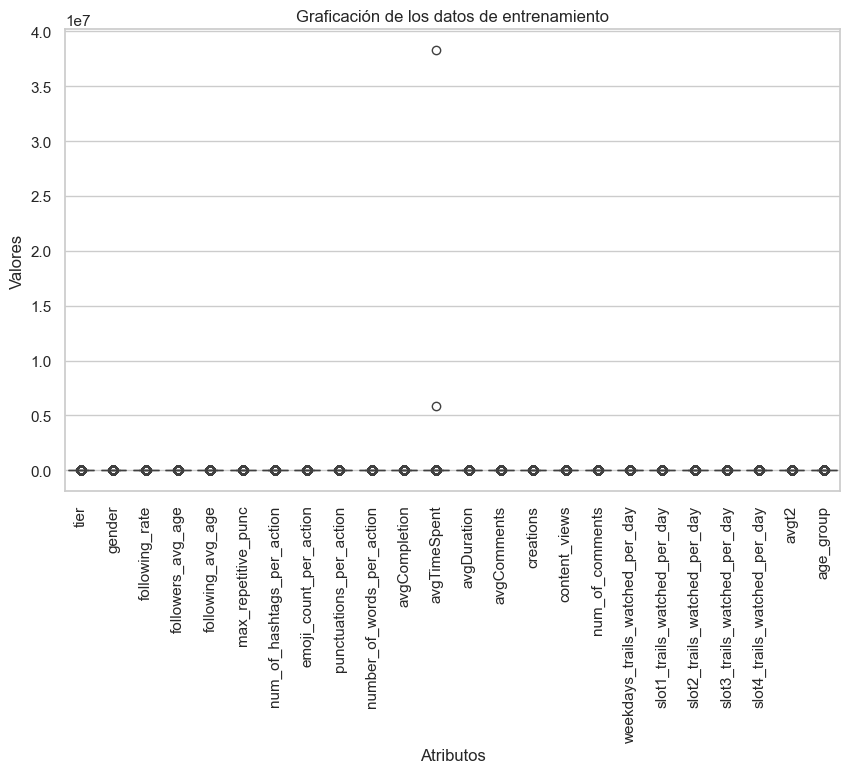

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train)
plt.xticks(rotation=90)
plt.title("Graficación de los datos de entrenamiento")
plt.xlabel("Atributos")
plt.ylabel("Valores")
plt.show()

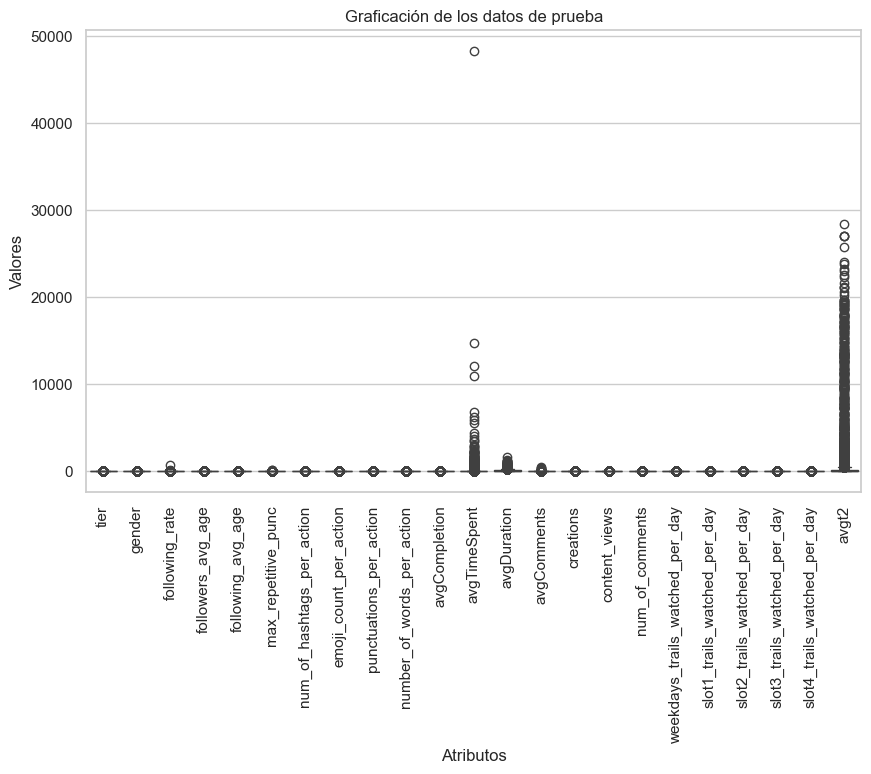

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=test)
plt.xticks(rotation=90)
plt.title("Graficación de los datos de prueba")
plt.xlabel("Atributos")
plt.ylabel("Valores")
plt.show()

Como podemos ver sí tenemos datos *extremos* en las columnas de tiempo promedio pasado en un video y el promedio del número de seguidores de todas las cuentas que sigue cada usuario (la explicación de estas columnas lo tomo directamente de Kaggle).

Ahora bien, los llamé datos extremos por su magnitud. Sin embargo, eso no significa que sean atípicos o que no se expliquen:
- La columna del tiempo promedio pasado por video en segundos puede tener valores excesivamente grandes si el usuario vio videos extremadamente largos (de varias horas). 
- La columna del promedio de seguidores de las cuentas que sigue el usuario es de esperar que sea muy grande si la red social ya tiene perfiles con miles o millones de seguidores. Si ese es el caso es muy fácil que este atributo tenga valores muy grandes.

Por lo tanto, si bien nos arruinan un poco la visualización, estos datos no considero que constituyan un problema para nuestro modelo. Sobre todo porque estamos trabajando con árboles de decisión: la magnitud de los valores no influye tanto en el resultado porque cada nodo va a tomar la pareja atributo-valor que mejor le sirva para clasificar los datos, independientemente de si hay o no outliers. Y en cuanto al posible porcentaje de efectividad (o la métrica que se desee) del modelo, estos valores no la van a modificar porque a final de cuentas nuestro modelo va a ser de un árbol de decisión para clasificación, no para regresión. De modo que el peor de los casos es que estos valores extremos sean mal clasificados, lo cual sólo se verá afectado en que subirá un poco la impureza del nodo.

## Preprocesamiento de los datos
* Manejo de datos nulos 
* Manejo de datos categóricos.

Dado que desde el inicio vimos que nuestro dataframe no tiene datos nulos y todos los atributos son numéricos, esta fase esta completa.

## Dividir los datos en la matriz X y el vector de etiquetas Y

Vamos con los de entrenamiento

In [22]:
Ytrain = train["age_group"]
Xtrain = train.drop("age_group", axis=1)

In [23]:
Xtrain.head()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,avgComments,creations,content_views,num_of_comments,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0,0.000000,0.200000,0.0,0.025000,0.0,0.000000,0.175000,0.033333,0.0
1,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,...,0,0.008475,0.093220,0.0,0.018644,0.0,0.084746,0.000000,0.033898,82.5
2,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0,0.000000,0.002786,0.0,0.000557,0.0,0.002786,0.000000,0.000000,0.0
3,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0,0.000000,0.008403,0.0,0.001681,0.0,0.000000,0.000000,0.008403,0.0
4,2,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,...,0,0.000000,0.204918,0.0,0.049180,0.0,0.008197,0.057377,0.180328,0.0


In [24]:
Ytrain.head()

0    1
1    2
2    1
3    1
4    1
Name: age_group, dtype: int64

In [25]:
Ytrain.value_counts()

age_group
1    308315
4     60803
3     60404
2     59355
Name: count, dtype: int64

Esto último muestra la frecuencia de cada clase que vamos a clasificar. Como la 1 es mucho más abundante va a ser bueno hacer validación cruzada de k partes y tendremos que estar pendientes de diferentes métricas para evaluar el modelo y evitar posibles sesgos.

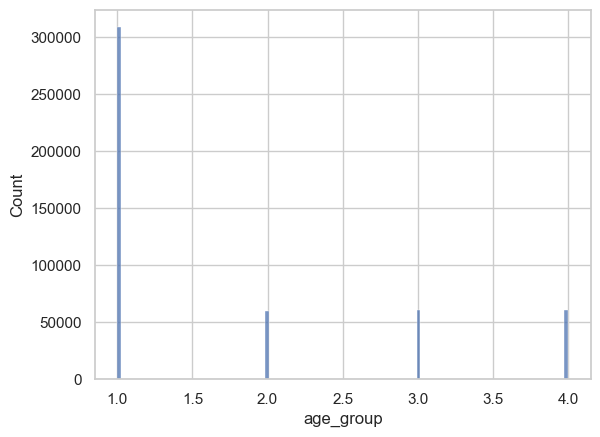

In [26]:
sns.histplot(Ytrain)
plt.show()

Vamos ahora con los de prueba

In [27]:
Xtest = test.iloc[:,:]
Ytest = sampleSubmission.iloc[:,:]

In [28]:
Xtest.head()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,avgComments,creations,content_views,num_of_comments,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,0.062992,0.0,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,2,1,0.001818,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,0.003636,0.0,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,1.028571,0.0,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,2,2,0.000000,0.0,0.0,4,0.0,0.0,0.0,0.130435,...,0,0.007937,0.166667,0.0,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,0.233871,0.0,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [29]:
Ytest.head()

,prediction
0,1
1,1
2,1
3,1
4,1


In [30]:
Ytest.value_counts()

prediction
1             54320
Name: count, dtype: int64

Aquí tenemos un problema: nuestro conjunto de prueba tiene para predecir una sola categoría. Igual y esto es consecuencia de la distribución desproporcionada de las clases en el conjunto de entrenamiento. Otra explicación podria ser que la misma naturaleza de la red social de la que estamos sacando los datos sea así: el grupo de edad principal es el número 1.

De una u otra forma este es el conjunto de datos para pruebas que nos dio Kaggle. Por lo tanto, aquí tenemos dos opciones: 
- Si lo que queremos es obtener la mejor puntuación para nuestro modelo en Kaggle, lo que nos interesaría sería tener un modelo cuya sensibilidad (recall) para detertar los 1 sea perfecta (que no se nos pase ni uno). Tanto así que un modelo que clasifique todo como 1 obtendrá una efectividad del 100 en Kaggle.
- Sin embargo, para fines de esta tarea, cuyo objetivo es practicar lo aprendido sobre árboles de decisión. Nuestro objetivo será tener un modelo equlibrado en recall y precisión en todas las clases (f1 más alta en todas las clases). Esto es lo que haré porque es infinitamente mejor para el aprendizaje.

## Creación del modelo

Antes de buscar la combinación óptima de los parámetros de nuestro modelo con la búsqueda en malla con validación cruzada, vamos a crear un modelo de ejemplo que nos sirva para ver cómo queda un árbol de decisión para nuestros datos.

Vamos entonces a probar con un árbol en estado aleatorio inicial de 0, usaremos como criterio de impureza el índice Gini, con profundidad máxima de 7 y un mínimo de 5 muestras en la hoja antes de dividirla.

In [31]:
model = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=7, min_samples_split=5)
model.fit(Xtrain, Ytrain)

DecisionTreeClassifier(max_depth=7, min_samples_split=5, random_state=0)

Vamos a observar el árbol creado con la función que usamos en la sesión

In [32]:
def arbol(tree, data):
    fig, ax = plt.subplots(figsize=(32, 12))

    print("Profundidad del árbol: ", tree.get_depth())
    print("Número de nodos terminales: ", tree.get_n_leaves())

    plot = plot_tree(
                decision_tree = model,
                feature_names = data.columns.tolist(),
                class_names   = None,
                filled        = True,
                impurity      = False,
                fontsize      = 11,
                ax            = ax)

Profundidad del árbol:  7
Número de nodos terminales:  65


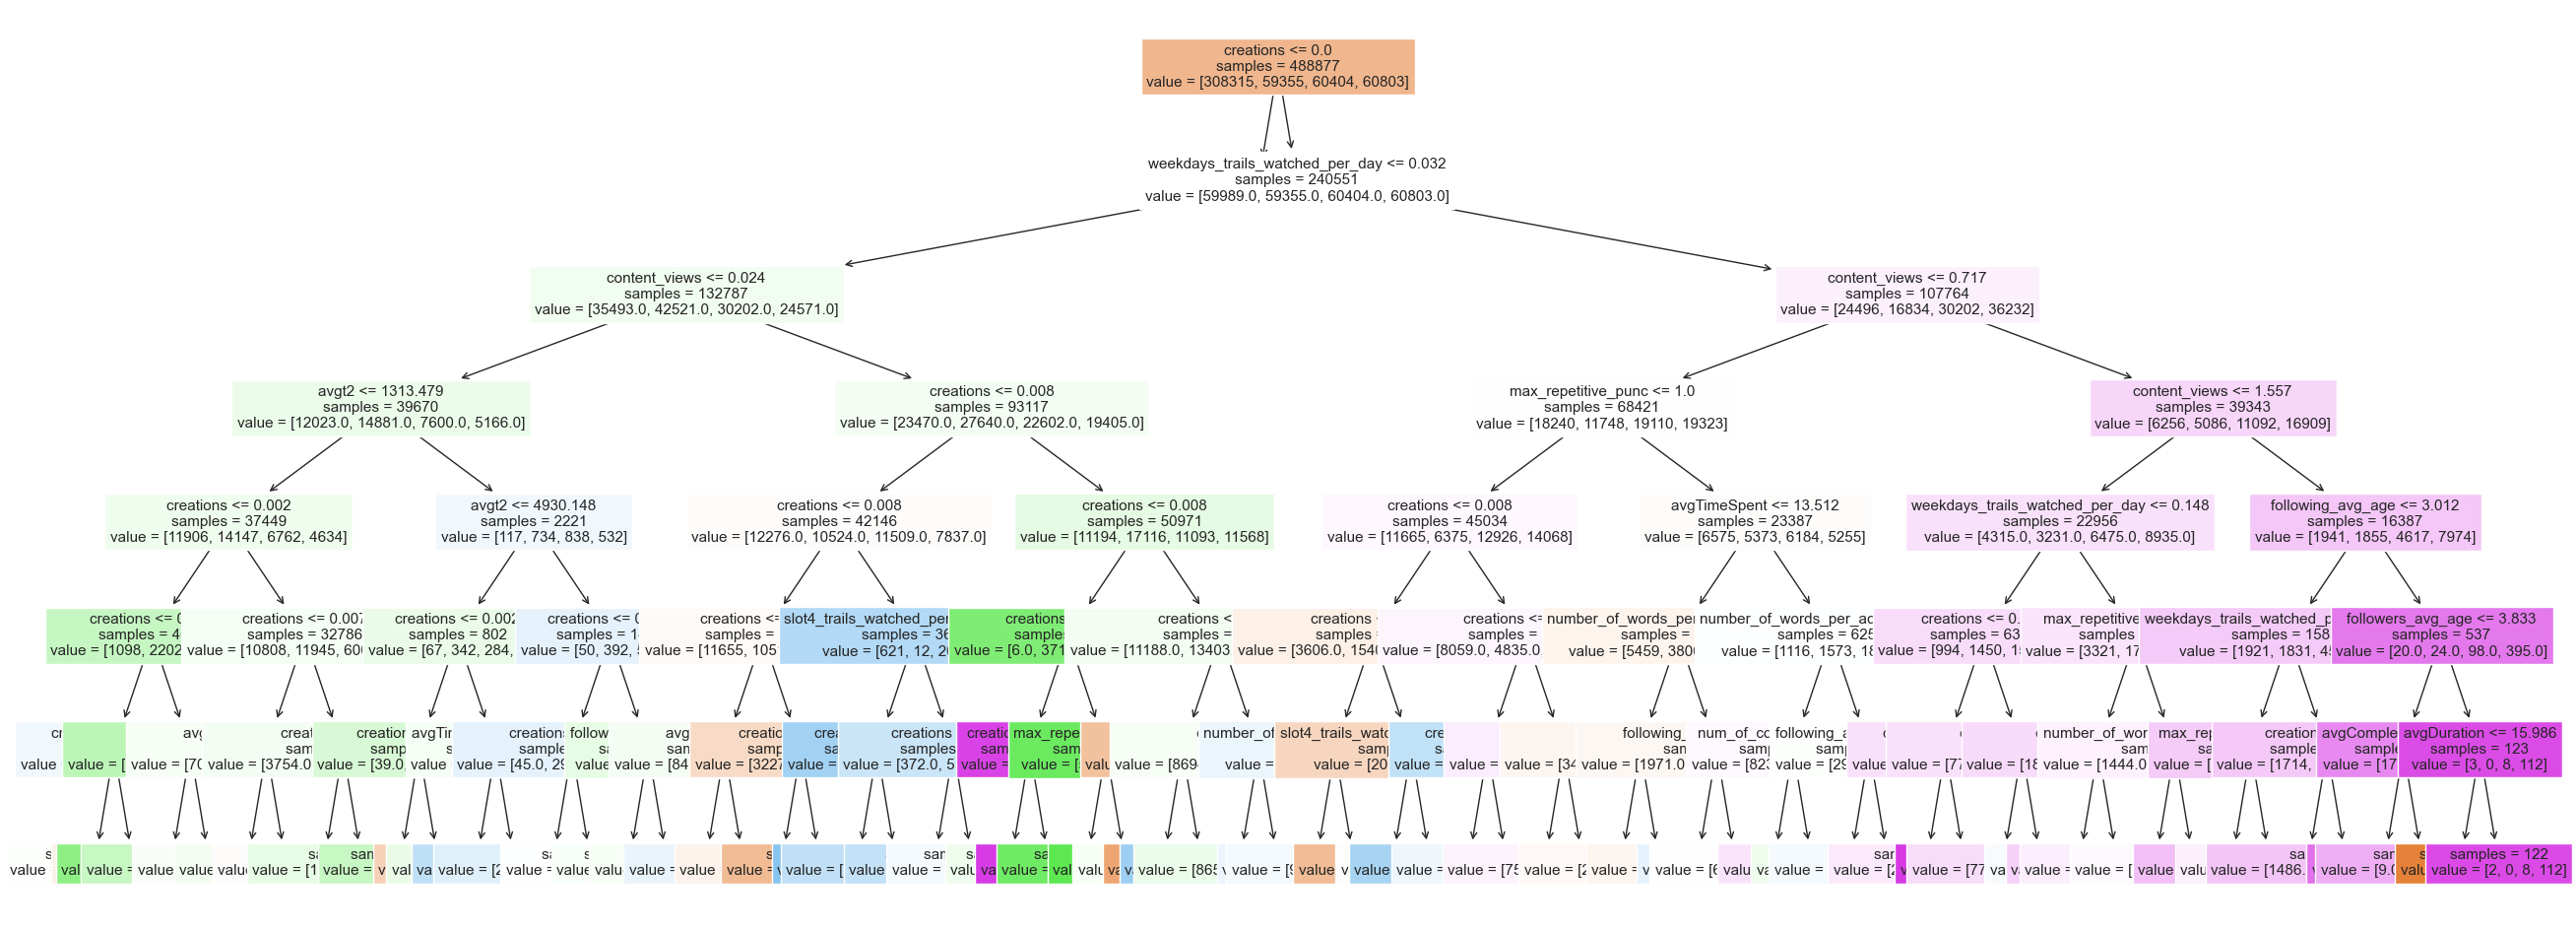

In [33]:
arbol(model, Xtrain)

A simple vista parece que no obtuvimos un muy buen modelo. Esto porque al ver el color de los nodos, vemos muchos muy claros: esto pasa cuando la impureza del nodo es muy alta. Lo cual al final se verá reflejado en una baja exactitud del modelo.

Igualmente hagamos predicciones para comprobarlo.

## Realizar predicciones

Vamos a utilizar la función de predicciones del notebook de la clase, adaptándola a nuestro dataframe. Sobre todo por el hecho de que nuestro problema es multiclase y el del ejemplo de la sesión es biclase. Además, vamos a agregar más métricas para evaluar el modelo.

In [34]:
def predicciones(tree, X, label):
    y_pred = tree.predict(X)
    y_true = label["prediction"]
    cm = confusion_matrix(y_true, y_pred, labels=tree.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
    disp.plot()
    plt.show()

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    sensibilidad = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f'Accuracy = {acc * 100:.2f}%')
    print(f"Precision = {precision * 100:.2f}%")
    print(f"Sensibilidad = {sensibilidad * 100:.2f}%")
    print(f'F1 Score = = {f1 * 100:.2f}%')

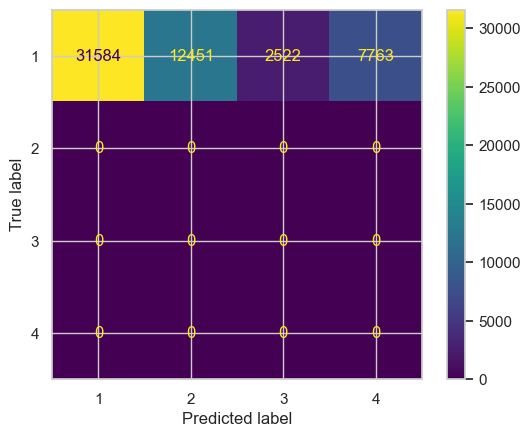

Accuracy = 58.14%
Precision = 25.00%
Sensibilidad = 14.54%
F1 Score = = 18.38%


c:\Users\arnol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
predicciones(model, Xtest, Ytest)

Aquí podemos hacer varias observaciones:
* La primera es que en nuestra función tuvimos que adaptar las métricas con el parámetro *average* para que nos las calcule por ser un problema multiclase. Cuando las métricas se calculan por separado para cada clase se pone *macro* o *weight*. Si se quieren combinar se poner *micro*
* La segunda es que nuestro modelo tiene un terrible caso de subajuste. 18.38% es muy bajo en la f1. Una posible explicación es que alguno de los parámetros que pusimos es muy malo. Sin embargo, creo que el problema principal está en el propio conjunto de prueba
* La tercera es justo del conjunto de prueba: sólo tenemos la clase 1 como respuesta. Si bien esto no justifica el mal desempeño del modelo, sí nos deja muy sesgados respecto a cómo funcionaría de verdad el modelo. 

Por lo tanto, antes de pasar a encontrar los mejores parámetros, mejoremos nuestros conjuntos de entrenamiento y validación usando el propio conjunto de entrenamiento original: vamos a dividirlo para obtener un conjunto de prueba con más clases que puros 1, aunque el conjunto de entrenamiento reduzca su tamaño.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
XtestKaggle, YtestKaggle = Xtest.iloc[:,:], Ytest.iloc[:,:]

In [38]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xtrain, Ytrain, test_size=0.2)

In [39]:
Xtrain

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,avgComments,creations,content_views,num_of_comments,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
460479,1,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,0.131148,0.000000,0.014754,0.065574,0.000000,0.000000,0.065574,0.000000
246318,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,0.552632,0.000000,0.115789,0.000000,0.026316,0.552632,0.000000,0.000000
86974,2,1,0.024000,2.0,3.5,4,0.0,0.0,0.0,0.200000,...,0,0.016000,0.056000,0.000000,0.000000,0.080000,0.000000,0.000000,0.024000,150.666667
331882,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,0.050847,0.000000,0.000000,0.000000,0.000000,0.000000,0.076271,0.000000
1978,2,1,0.015873,0.0,0.0,0,0.0,0.0,0.0,0.200000,...,0,0.007937,0.023810,0.000000,0.014286,0.007937,0.047619,0.047619,0.000000,140.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149181,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,0.096774,0.000000,0.000000,0.000000,0.000000,0.096774,0.000000,0.000000
56183,1,1,0.041322,3.0,3.0,0,0.0,0.0,0.0,0.040000,...,1,0.008264,0.181818,0.008264,0.047934,0.140496,0.000000,0.099174,0.000000,157.400000
403985,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.090909,...,0,0.007937,0.071429,0.000000,0.014286,0.000000,0.000000,0.000000,0.071429,157.666667
111444,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,...,0,0.000000,0.090909,0.000000,0.013636,0.000000,0.000000,0.000000,0.068182,0.000000


In [40]:
Ytrain.value_counts()

age_group
1    246719
4     48459
3     48456
2     47467
Name: count, dtype: int64

In [41]:
Xtest

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,avgComments,creations,content_views,num_of_comments,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
447925,2,2,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000,0.000000,...,0,0.000000,0.020408,0.0,0.004082,0.000000,0.000000,0.000000,0.020408,0.000000
363386,2,1,0.037402,3.000000,2.647059,0,0.0,0.0,0.000000,0.285714,...,0,0.005906,0.005906,0.0,0.001181,0.000000,0.005906,0.000000,0.000000,187.108696
326149,2,1,0.096774,1.500000,1.333333,2,0.0,0.0,0.000000,0.133333,...,0,0.024194,0.088710,0.0,0.014516,0.056452,0.016129,0.104839,0.080645,251.800000
167907,2,1,0.009009,0.000000,0.000000,0,0.0,0.0,0.000000,0.045872,...,0,0.036036,1.918919,0.0,0.181982,0.000000,0.468468,0.477477,0.981982,194.823529
193929,2,1,0.072000,1.833333,1.666667,0,0.0,0.0,0.030303,0.681818,...,0,0.088000,0.432000,0.0,0.001600,0.000000,0.016000,0.456000,0.168000,175.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8847,2,2,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000,0.000000,...,0,0.000000,0.495868,0.0,0.132231,0.000000,0.454545,0.206612,0.000000,0.000000
188940,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000,0.000000,...,0,0.000000,0.073770,0.0,0.016393,0.000000,0.024590,0.057377,0.000000,0.000000
14350,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000,0.000000,...,0,0.000000,0.008475,0.0,0.000000,0.000000,0.008475,0.000000,0.000000,0.000000
304575,1,1,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000,0.000000,...,0,0.000000,0.580645,0.0,0.111290,0.000000,0.314516,0.258065,0.032258,0.000000


In [42]:
Ytest.value_counts()

age_group
1    61596
4    12344
3    11948
2    11888
Name: count, dtype: int64

Con esto ya está mucho mejor. Vamos entonces a repetir el proceso de crear el modelo y hacer las predicciones, pero con este conjunto de entrenamiento y prueba

In [43]:
model = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=7, min_samples_split=5)
model.fit(Xtrain, Ytrain)

DecisionTreeClassifier(max_depth=7, min_samples_split=5, random_state=0)

Profundidad del árbol:  7
Número de nodos terminales:  65


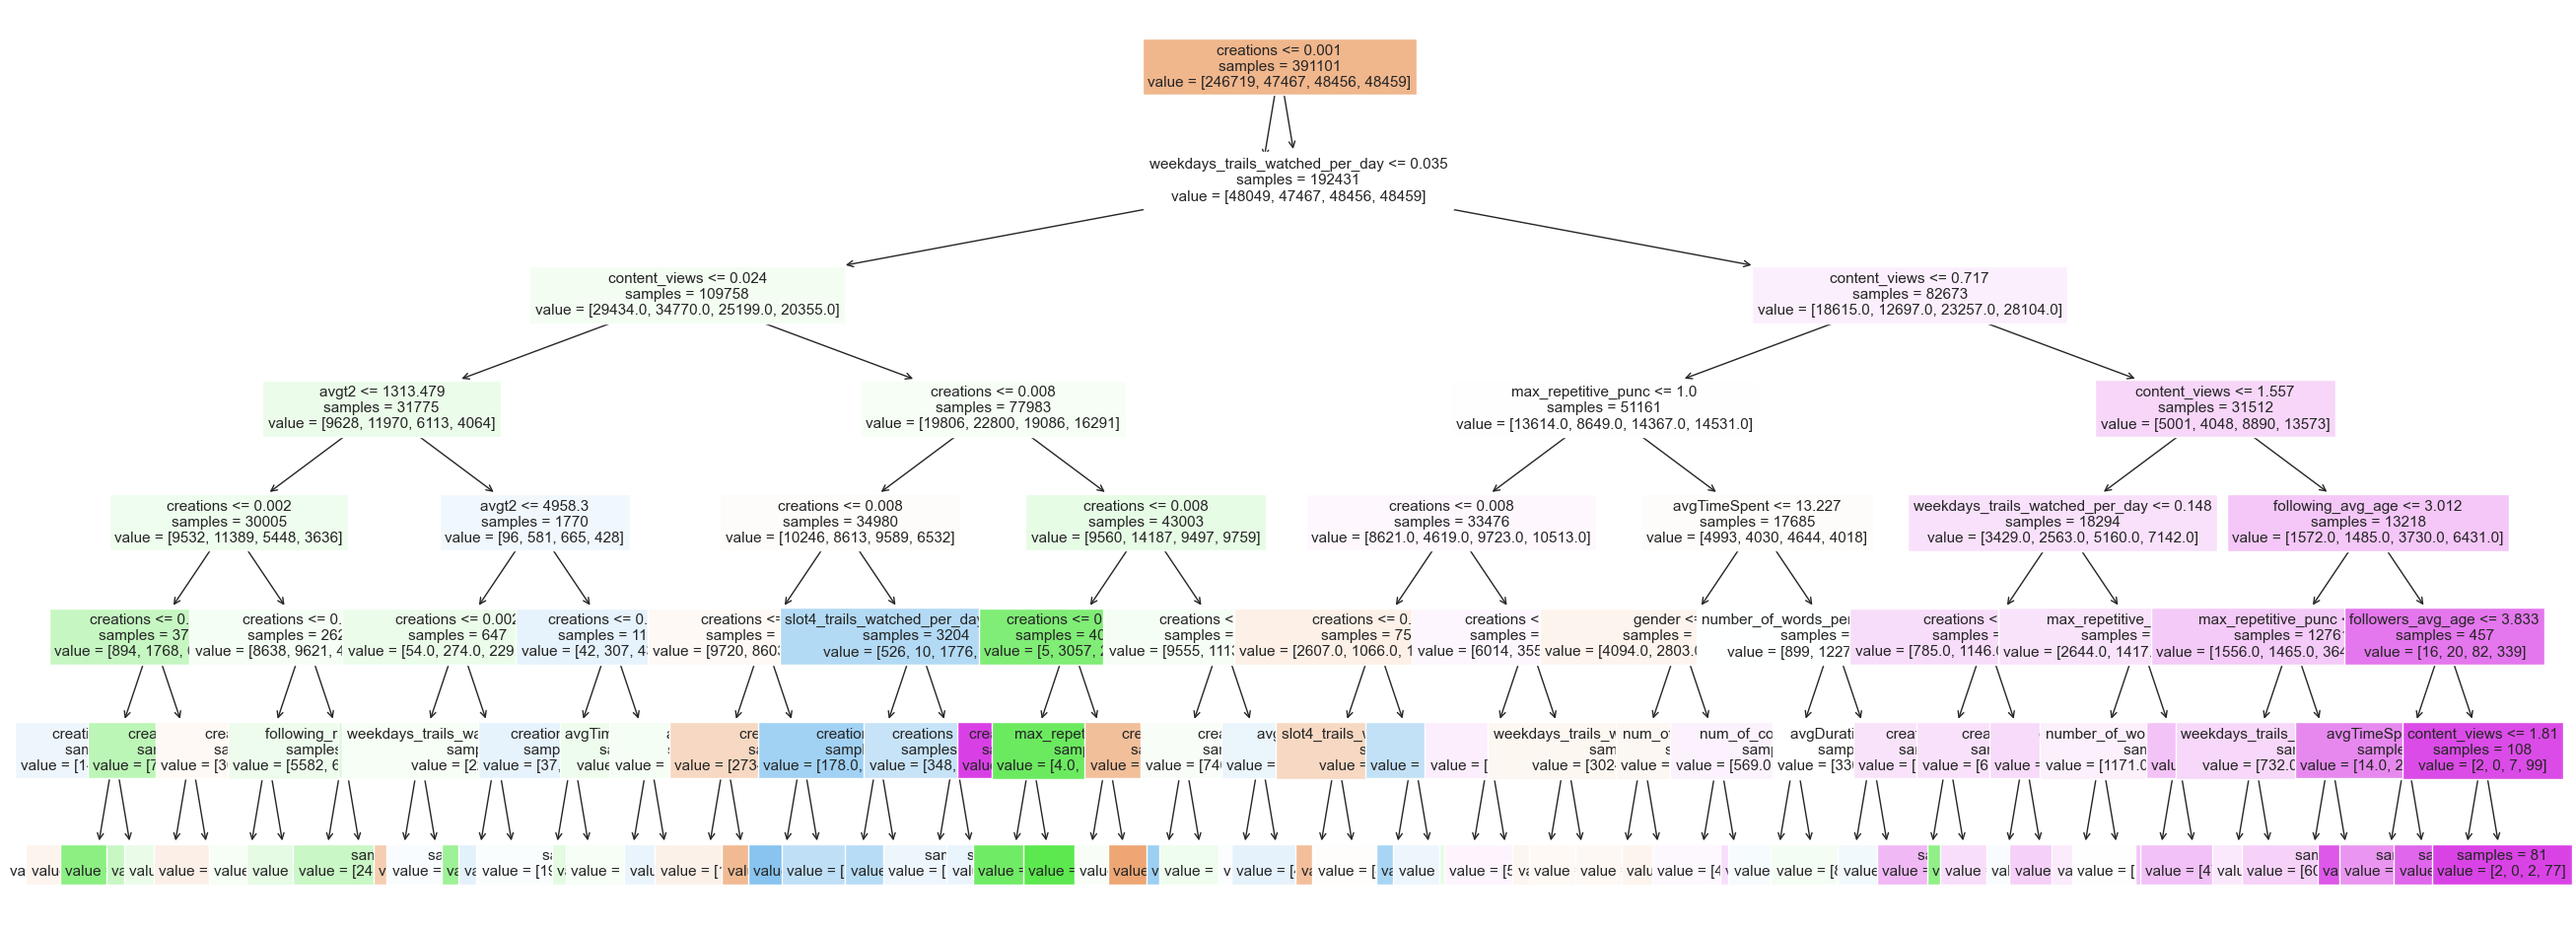

In [44]:
arbol(model, Xtrain)

Primera diferencia notable con el primer modelo: ya no tenemos tantos nodos impuros. Esto lo vemos porque hay menos nodos sin color. Ya con esto podemos estar casi seguros de que las métricas del modelo van a subir.

Vamos a modificar un poco la función de predicciones porque las caracteríticas de los dataframes cambian con la función de train_test_split

In [45]:
def prediccionesNoKaggle(tree, X, label):
    y_pred = tree.predict(X)
    y_true = label
    cm = confusion_matrix(y_true, y_pred, labels=tree.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
    disp.plot()
    plt.show()

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    sensibilidad = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f'Accuracy = {acc * 100:.2f}%')
    print(f"Precision = {precision * 100:.2f}%")
    print(f"Sensibilidad = {sensibilidad * 100:.2f}%")
    print(f'F1 Score = = {f1 * 100:.2f}%')

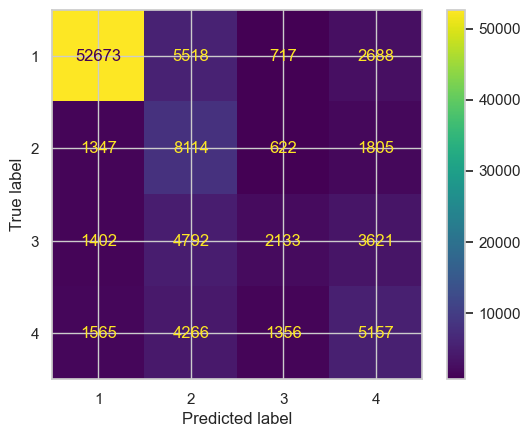

Accuracy = 69.63%
Precision = 52.81%
Sensibilidad = 53.35%
F1 Score = = 50.37%


In [46]:
prediccionesNoKaggle(model, Xtest, Ytest)

Aquí seguimos con problemas de subajuste. Que la f1 la tengamos en 50% quiere decir que nuestro modelo sólo aprendió la distribución de probabilidad de los datos y genera una función aleatoria con esa distribución de probabilidad.

Por lo tanto, ya es necesario encontrar la mejor combinación de parámetros para crear nuestro árbol de decisión.

## Encontrar los mejores parámetros del modelo - solución para diferentes métricas

Aquí debemos proponer la combinación de parámetros para la búsqueda en malla junto con la validación cruzada. Debemos ser cuidadosos con la combinatoria, porque cuando ejecutamos un sólo árbol tardamos 2.6 segundos por la cantidad de registros en nuestros datos de entrenamiento. Además, es importante tener cuidado con la f1 como score por el tema de que estamos trabajando con predecir varias clases

In [49]:
from sklearn.metrics import make_scorer

In [50]:
def f1_multiclase(Ytest, Ypred):
    return f1_score(Ytest, Ypred, average='macro')

In [55]:
params = {
    'random_state': [0,1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
}

grid = GridSearchCV(DecisionTreeClassifier(), params, scoring=make_scorer(f1_multiclase), cv=10)

Suponiendo que en promedio cada árbol se forma en 3 segundos, propuse la siguiente combinación de parámetros:
- 10 estados aleatorios
- 2 criterios de pureza
- 10 niveles diferentes de profundidad
- No incluir en la búsqueda en malla los criterios de división de un nodo con la cantidad mínima para dividirlo o para formar una hoja. 

Es cierto que omitir estos criterios puede provocar que nuestro modelo sobreajuste. Sin embargo, prefiero sacrificar esos parámetros a cambio de poder hacer la validación cruzada con 10 partes.

Por lo tanto, la ejecución será lenta, pero esperando que la f1 del modelo suba. En teoría si hacemos el cálculo con la suposisición de 3 segundos por árbol tenemos que vamos a tardar:

In [54]:
print(f"{round(3*10*2*10*10/3600, 2)} horas")

1.67 horas


In [56]:
%%time
grid.fit(Xtrain, Ytrain)

CPU times: total: 1h 6min 41s
Wall time: 1h 6min 47s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring=make_scorer(f1_multiclase, response_method='predict'))

No duró todo lo que esperaba, pero sí se llevó más de una hora. Veamos entonces los resultados.

In [57]:
scores = pd.DataFrame(grid.cv_results_)
gini = scores[scores["param_criterion"] == "gini"]
entropy = scores[scores["param_criterion"] == "entropy"]

Veamos la gráfica de comparación entre ambos parámetros como en la sesión.

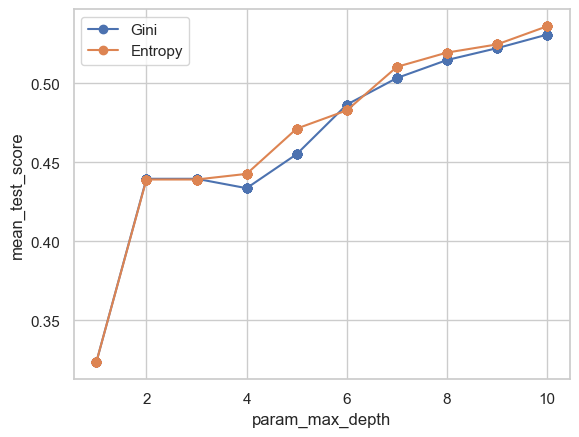

In [58]:
plt.plot(gini['param_max_depth'], gini['mean_test_score'], 'o-')
plt.plot(entropy['param_max_depth'], entropy['mean_test_score'], 'o-')
plt.xlabel('param_max_depth')
plt.ylabel('mean_test_score')
plt.legend(['Gini', 'Entropy'])
plt.grid(True)

Aquí es curioso ver la correlación positiva entre la máxima profundidad de las ramas y la media del score (f1). Vemos que tanto la entropía, como el índice Gini se comportan igual. Sin embargo, desde aquí podemos notar que entre más crecen las ramas, mejores resultados se alcanzan. Esto en parte es por el sobrejuste que naturalmente se alcanza con el nivel de profundidad del árbol. Lo interesante sería ver si existe una cota de crecimiento para la f1 al extender la profundidad.

Por ahora, primero obtengamos los resultados óptimos de nuestra validación cruzada.

In [59]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'random_state': 9}

In [60]:
grid.best_score_

0.5362702595464099

Es decepcionante sólo haber subido el modelo de 50% a 53%.

Igualmente veamos el modelo de nuestra búsqueda en malla con validación cruzada.

# 3. Ejemplo de ejecución con la solución

In [61]:
model_final = grid.best_estimator_

Profundidad del árbol:  10
Número de nodos terminales:  470


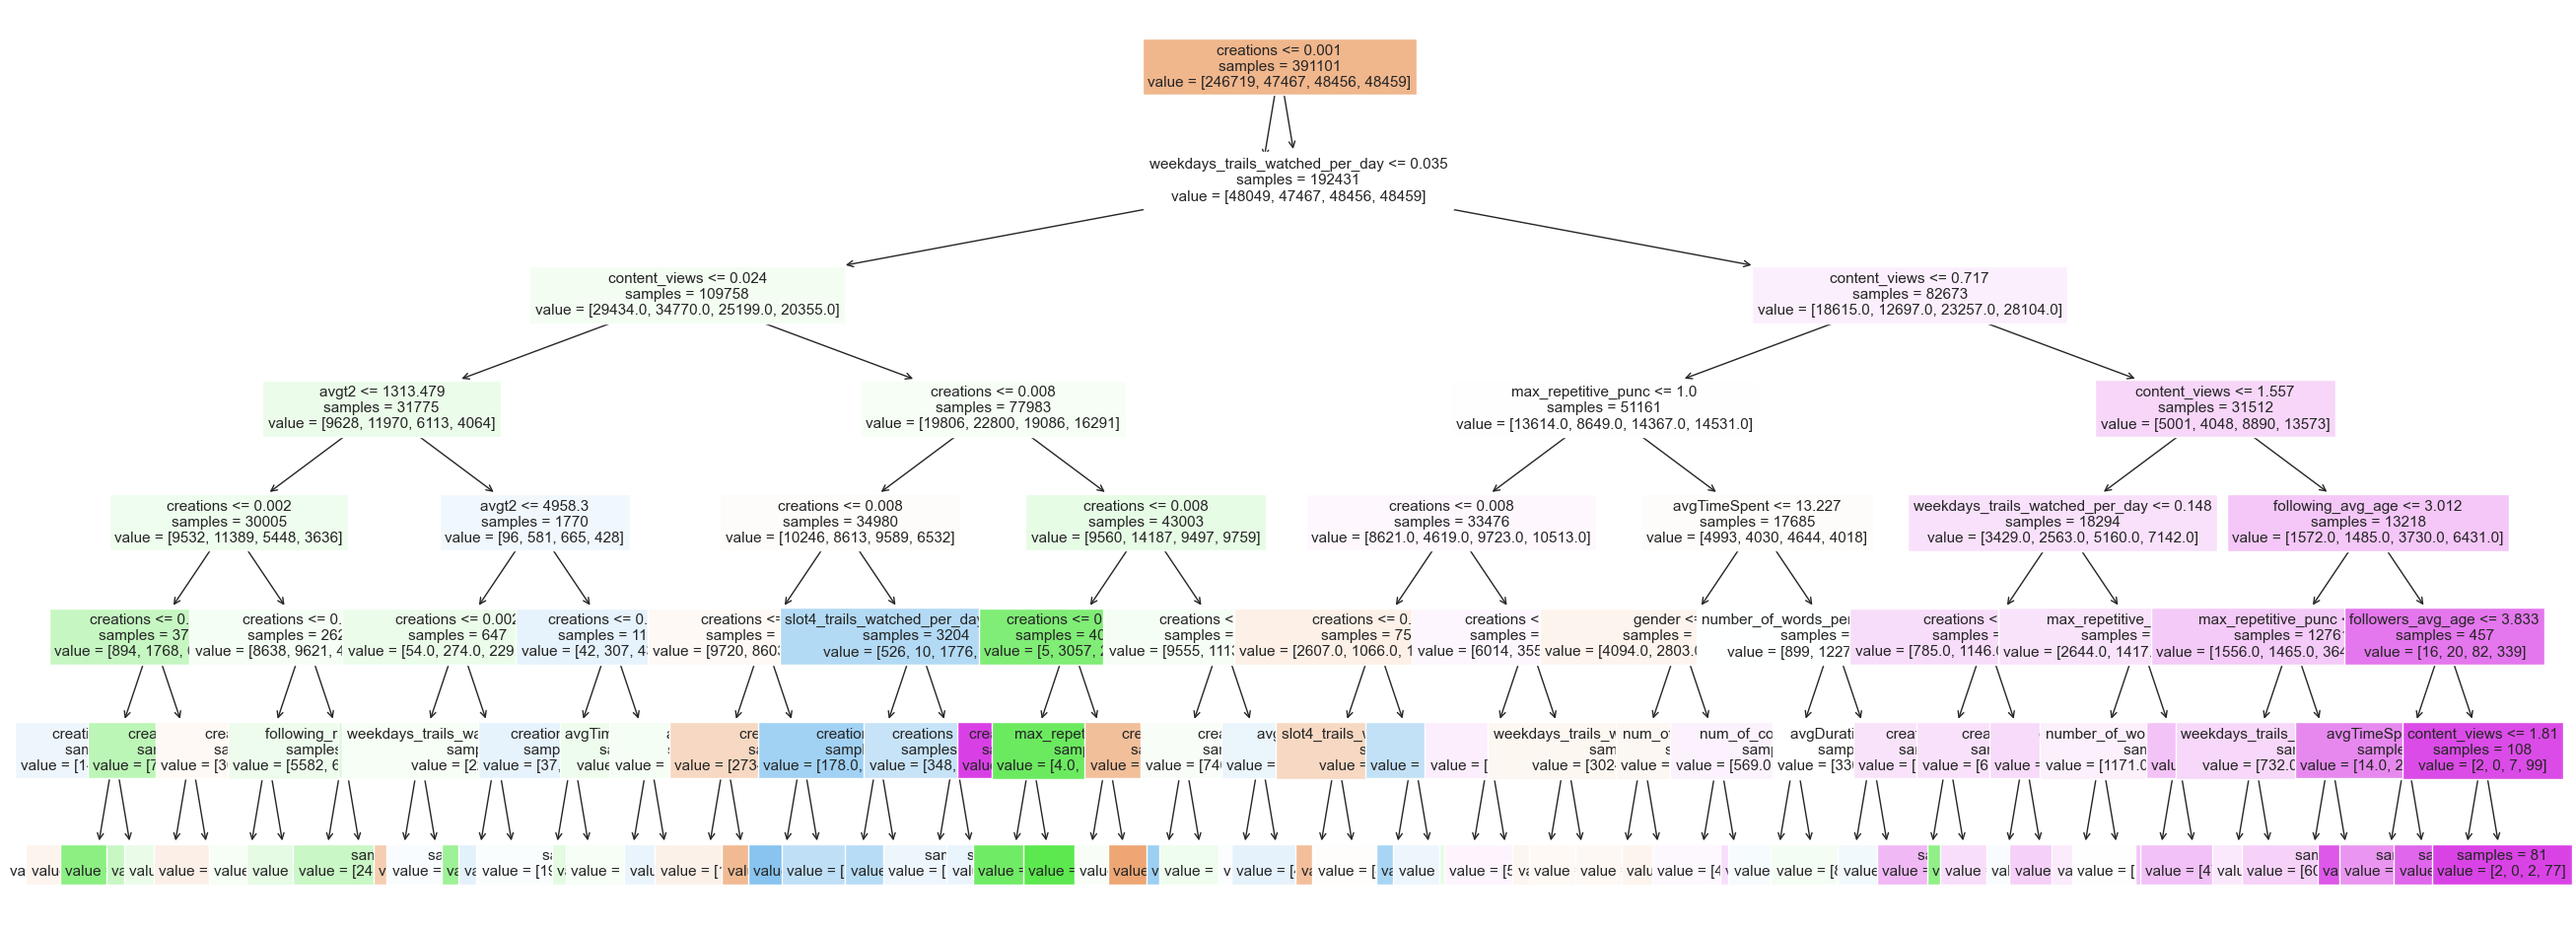

In [62]:
arbol(model_final, Xtrain)

Nótese que no es muy diferente al que ya teníamos desde un inicio.

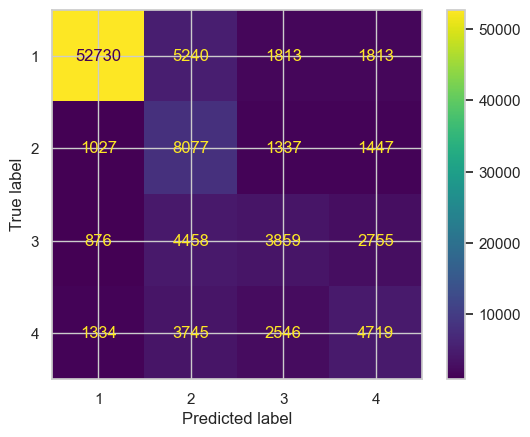

Accuracy = 70.96%
Precision = 54.02%
Sensibilidad = 56.02%
F1 Score = = 53.71%


In [63]:
prediccionesNoKaggle(model_final, Xtest, Ytest)

Como podemos ver, a nivel de efectividad no es tan malo el modelo. Lo que le afecta es la mala clasificación de otras clases: para la clase 2 la predijo demasiadas veces en otras instancias. O los errores tanto de tipo 1 y 2 entre las clases 3 y 4.

Aquí presento 2 hipótesis que pueden ayudar a entender este caso:
1. El desbalanceo en la cantidad de registros por clase nos afectó demasiado. En este caso el set de datos no funciona bien con este modelo y se tendría que mejor buscar otros modelos diferentes a los árboles de decisión.
2. No hemos encontado la configuración correcta de los parámetros del árbol de decisión.

Para no quedarme con la duda sobre la hipótesis 2 haré un modelo con el doble de profundidad. Es cierto que con eso podría caer en sobreajustar el modelo. Sin embargo, por las observaciones en la gráfica donde separamos los índices de pureza y visualizamos los resultados de la búsqueda en malla, creo que vale la pena ver este modelo profundo. Si no funiciona o presenta sobreajuste descartamos la hipótesis 2 y nos quedamos con la 1: este set de datos está desbalanceado y no funciona para árboles de decisión.

In [64]:
modeloProdundo = DecisionTreeClassifier(random_state=9, criterion="entropy", max_depth=20)
modeloProdundo.fit(Xtrain, Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=9)

Profundidad del árbol:  20
Número de nodos terminales:  20175


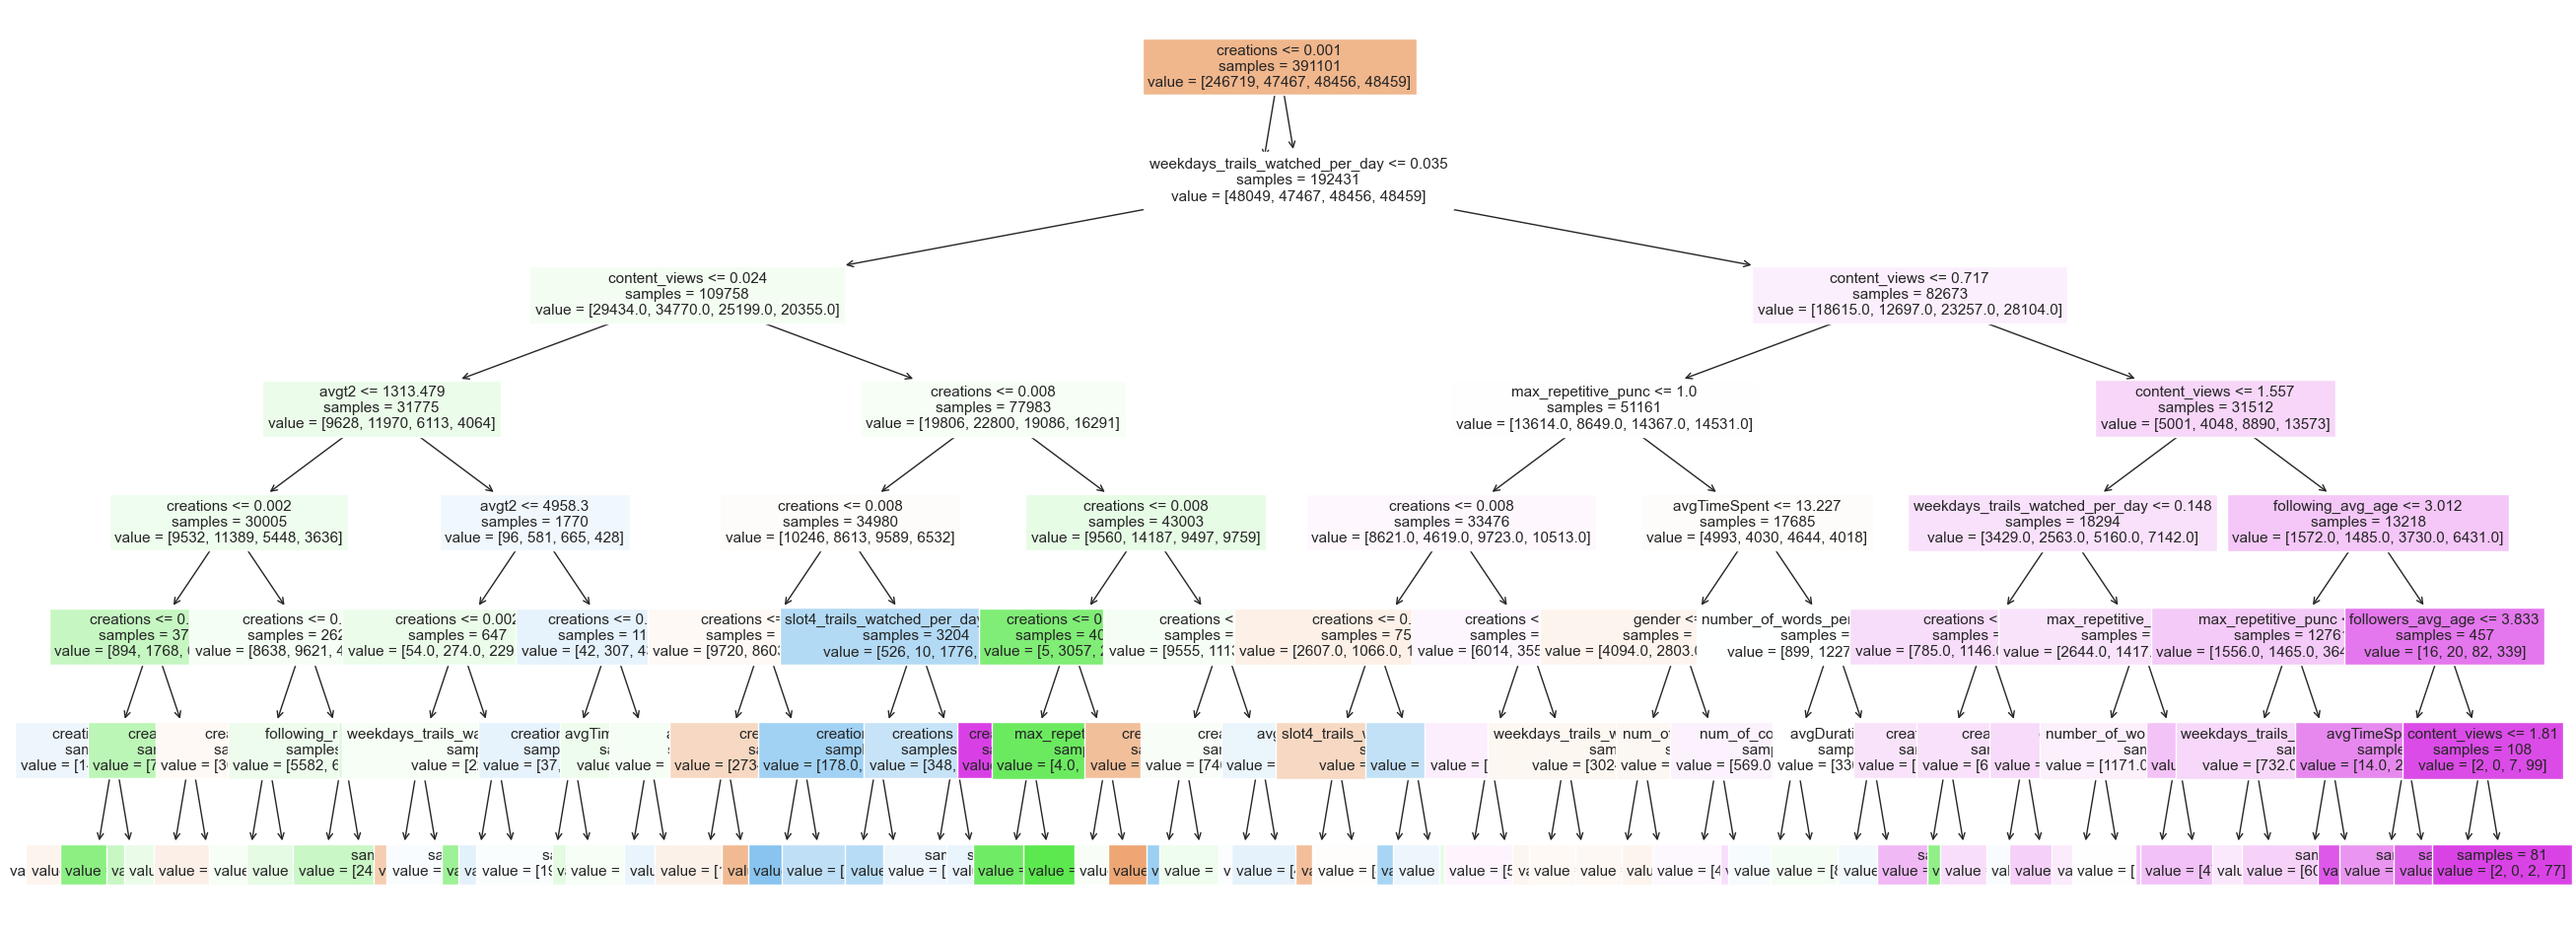

In [65]:
arbol(modeloProdundo, Xtrain)

Parece casi igual que el modelo óptimo de nuestra búsqueda en malla.

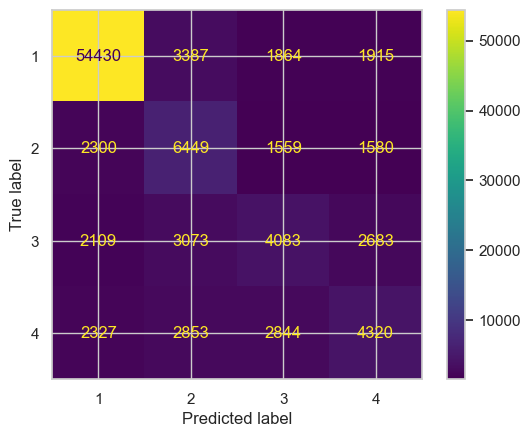

Accuracy = 70.86%
Precision = 52.63%
Sensibilidad = 52.95%
F1 Score = = 52.44%


In [66]:
prediccionesNoKaggle(modeloProdundo, Xtest, Ytest)

Es curioso que obtuvimos casi los mismos resultados. De hecho, nuestra f1 bajó un 1%. Por lo tanto, no vale la pena subir la profundiad al modelo.

Veamos cómo se comportan con el conjunto de pruebas de Kaggle (puros 1's)

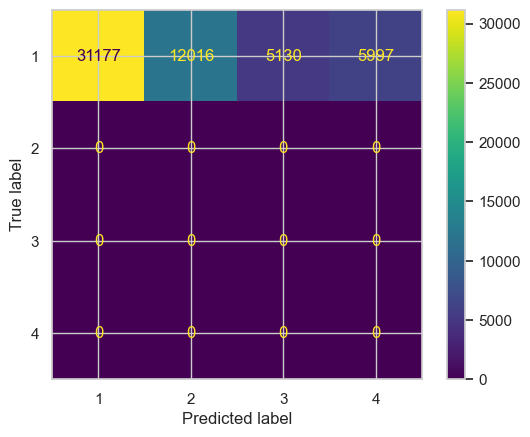

Accuracy = 57.40%
Precision = 25.00%
Sensibilidad = 14.35%
F1 Score = = 18.23%


c:\Users\arnol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
predicciones(model_final, XtestKaggle, YtestKaggle)

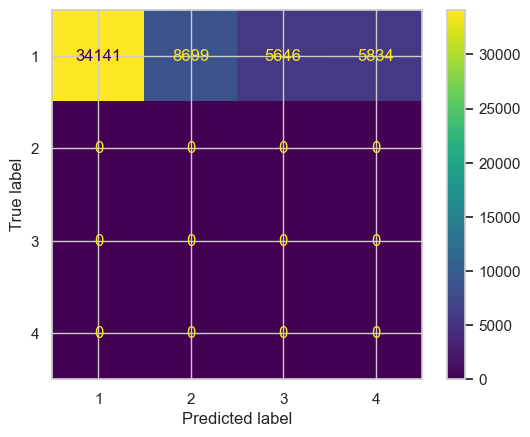

Accuracy = 62.85%
Precision = 25.00%
Sensibilidad = 15.71%
F1 Score = = 19.30%


c:\Users\arnol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
predicciones(modeloProdundo, XtestKaggle, YtestKaggle)

Como podemos ver aun en el test de Kaggle seguimos teniendo bajos porcetajes en nuestras métricas provocadas por la mala claseifición de las otras clases como 1. Sin embargo, aquí sí podemos notar una mejora entre el modelo de profundidad 10 y el de 20 de profundidad. Esto no significa que un modelo sea mejor que otro. Igual y aquí simplemente sí estamos viendo los resultados del sobre ajuste.

# 4. Conclusiones

Hacer un modelo funcional de machine learning no es algo trivial. No se trata de nada más limpiar los datos y crear el modelo con un algoritmo determinado. Hay que conocer bien cómo funciona el algoritmo para poder proponer métricas oportunas para el modelo. El objetivo de esto es no llegar al punto del sobreajuste, pero sí obtener un buen entrenamiento para la clasificación (o regresión, según sea el caso).

Sinceramente, no me quedo conforme con el resultado obtenido en este modelo de árbol de decisión. Si bien un accuracy del 70% no es tan malo, la métrica de la f1 sí nos bajó mucho al observar la matriz de confusión. Ahora bien, el hecho de que aun subiendo la profundidad máxima del árbol no se suban las métricas (o en otras palabras, el hecho de que aun sobreajustando el modelo no suban las métricas), nos indica que posiblemente el conjunto de datos no se puede abordar eficazmente con árboles de decisión. Esta afirmación la hago con base en el árbol que hice de profundidad 20: tiene más de 200,000 nodos hoja cuando el conjunto de entrenamiento era de un poco más de 300,000 registros. Claramente hay sobreajuste, pero ni con eso se logra subir la f1.

Ahora bien, en cuanto a objetivos didácticos de esta actividad considero que sí se cumplieron: hicimos la limpieza de datos bastante rápido, se propusieron muchas formas de hacer árboles de decisión con diferentes parámetros, se aplicaron todos los conceptos estudiados en las sesiones sobre esta clase de modelos de aprendizaje supervisado y realizamos el proceso de búsqueda en malla con validación cruzada (aun con el alto costo computacional que implica).

Para futuros trabajos hay dos caminos claros:
- Usamos un nuevo dataset para aplicar árboles de decisión con el fin de conseguir un modelo con mejores resultados 
- Usamos este mismo dataset pero con otro tipo de algoritmo de clasificación. KNN siempre es bueno probarlo (aunque al tener tantas variables puede que nos afecte con el tema de la dimensionalidad y la pérdida de información para diferenciar instancias). Alguna variable de Naive Bayes podría funcionar también por tratarse de un modelo probabilístico. Incluso con regresión logística para clasificación multiclase.

# 5. Referencias

Además del material del presente diplomado sobre árboles de decisión, métricas para evaluar un modelo de machine learning y limpieza de datos. Se acudió a la siguiente documentación de scikit-learn.

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html